# Capstone project
### Prediction of accidents
This jupyter notebook will be mainly used for the capstone project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#!conda install -c anaconda seaborn -y
import seaborn as sns

In [2]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


### Exploring dataset and target the project
https://www.data.gouv.fr/en/datasets/base-de-donnees-accidents-corporels-de-la-circulation/#_

file:///C:/Users/x169021/Downloads/description-des-bases-de-donnees-onisr-annees-2005-a-2018.pdf
file:///C:/Users/x169021/Downloads/descriptif_des_variables_pour_le_fichier_de_2005_a_2010.pdf

In [2]:
df_usag = pd.read_csv("usagers-2017.csv")
df_usag = df_usag.append(pd.read_csv("usagers_2016.csv"))
df_lieux = pd.read_csv("lieux_2016.csv")
df_lieux = df_lieux.append(pd.read_csv("lieux-2017.csv"))
df_veh = pd.read_csv("vehicules_2016.csv")
df_veh = df_veh.append(pd.read_csv("vehicules-2017.csv"))

df_caract = pd.read_csv("caracteristiques_2016.csv", encoding="latin-1")
df_caract = df_caract.append(pd.read_csv("caracteristiques-2017.csv", encoding="latin-1"))

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print("df_caract", df_caract.shape, len(df_caract.Num_Acc.unique()))
print("df_usag", df_usag.shape, len(df_usag.Num_Acc.unique()))
print("df_lieux", df_lieux.shape, len(df_lieux.Num_Acc.unique()))
print("df_veh", df_veh.shape, len(df_veh.Num_Acc.unique()))

df_caract (120133, 16) 120133
df_usag (269443, 12) 120133
df_lieux (120133, 18) 120133
df_veh (205470, 9) 120133


### We have to merge by accident

In [3]:
#merge accident with data location
df = df_caract.merge(df_lieux, on=["Num_Acc"])
#merge person with vehicle
indiv = df_usag.merge(df_veh, on=["Num_Acc","num_veh"])
#final merge
df = df.merge(indiv, on=["Num_Acc"])

Num_Acc       AxesSubplot(0.125,0.125;0.0503247x0.755)
an          AxesSubplot(0.18539,0.125;0.0503247x0.755)
mois       AxesSubplot(0.245779,0.125;0.0503247x0.755)
jour       AxesSubplot(0.306169,0.125;0.0503247x0.755)
lum        AxesSubplot(0.366558,0.125;0.0503247x0.755)
agg        AxesSubplot(0.426948,0.125;0.0503247x0.755)
int        AxesSubplot(0.487338,0.125;0.0503247x0.755)
atm        AxesSubplot(0.547727,0.125;0.0503247x0.755)
col        AxesSubplot(0.608117,0.125;0.0503247x0.755)
com        AxesSubplot(0.668506,0.125;0.0503247x0.755)
lat        AxesSubplot(0.728896,0.125;0.0503247x0.755)
long       AxesSubplot(0.789286,0.125;0.0503247x0.755)
dep        AxesSubplot(0.849675,0.125;0.0503247x0.755)
dtype: object

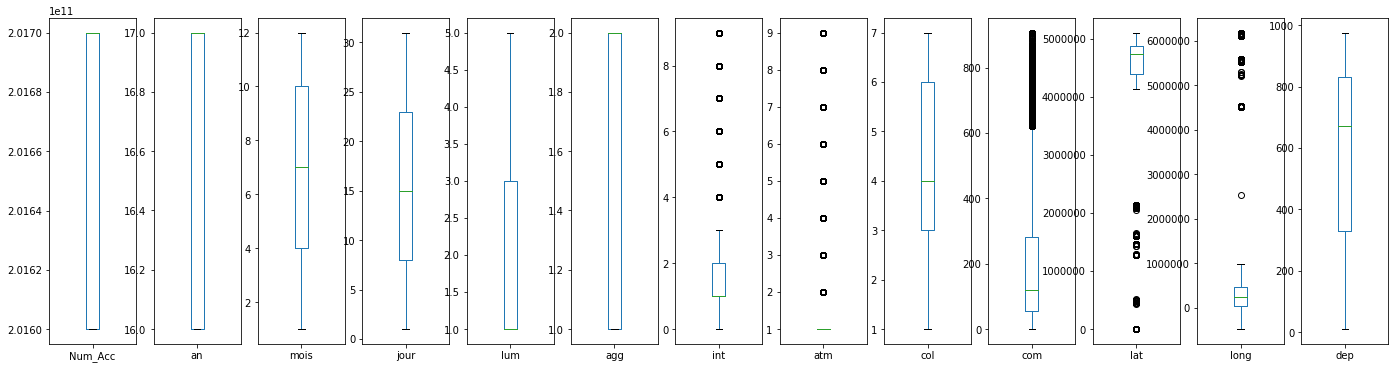

In [50]:
df_caract.plot.box(rot=0, subplots=True, figsize=(24, 6))

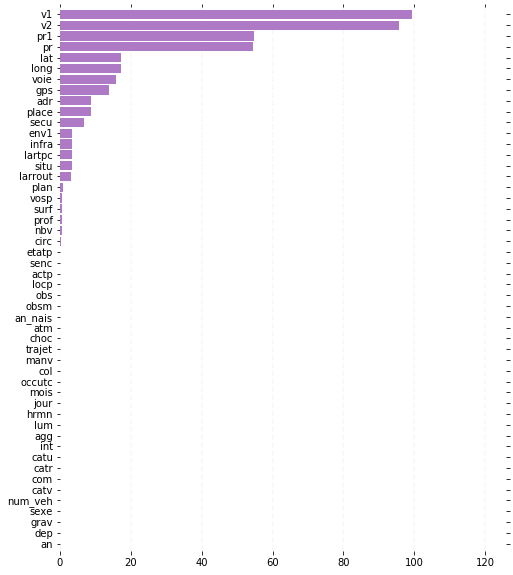

In [42]:
nan_values = df.isna().sum()

nan_values = nan_values.sort_values(ascending=True)*100/269443

ax = nan_values.plot(kind='barh', 
                     figsize=(8, 10), 
                     color='#AF7AC5',
                     zorder=2,
                     width=0.85)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.tick_params(axis="both", 
               which="both", 
               bottom="off", 
               top="off", 
               labelbottom="on", 
               left="off", 
               right="off", 
               labelleft="on")

vals = ax.get_xticks()

for tick in vals:
  ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

Few features are incorrectly known, we drop them

In [4]:
df = df.drop(columns = ['v1','v2',"gps","adr","secu","env1","infra",'lartpc','larrout'
                        ,'locp','etatp','actp','voie','pr1','pr','place']) #an column is the year

In [5]:
# AND we remove all row with missing data
df = df.dropna()
df.shape

(212241, 35)

In [6]:
hrmn=pd.cut(df['hrmn'],24,labels=[str(i) for i in range(0,24)])
df.hrmn=hrmn.values

In [7]:
dayofweek = pd.to_datetime("20"+df.an.astype(str)+df.mois.astype(str)+df.jour.astype(str), format='%Y%m%d').dt.dayofweek
df["dayofweek"] = dayofweek

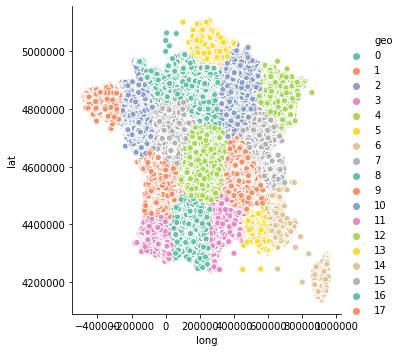

In [15]:
sns.relplot(
    data=df, x="long", y="lat",# col="an",#df.Num_Acc.astype(str)[2:4], #row='grav',
    hue="geo",# size="grav",# style="geo",
    palette="Set2"#, sizes=(10, 100)
)

In [8]:
df = df.drop(df[df.lat<3500000].index)

In [9]:
df = df.drop(df[(df.lat<4700000)&(df.long<-300000)].index)

In [10]:
df = df.drop(df[(df.lat>4990000)&(df.long>600000)].index)

In [11]:
df = df.drop(df[(df.lat<4700000)&(df.lat>4400000)&(df.long>800000)].index)

In [12]:
df = df.drop(df[(df.lat<4235000)&(df.long<800000)][["lat","long"]].index)

In [13]:
from sklearn.cluster import KMeans

lat = df.lat
long = df.long

X_cluster = np.array((list(zip(lat, long))))

#we define 18 areas
clustering = KMeans(n_clusters=18, random_state=0)
clustering.fit(X_cluster)

geo = pd.Series(clustering.labels_, index=df.index)
df["geo"] = geo
df.geo.value_counts()

0     58834
5     17224
1     13973
17    10993
2      9984
4      9653
7      9039
16     7626
8      7570
13     7524
11     7123
12     6344
9      6190
15     6091
14     6055
10     5386
3      4632
6      1924
Name: geo, dtype: int64

In [14]:
df.corr().style.background_gradient(cmap='coolwarm')

In [14]:
#we remove agg because catr is correlated and give more detail with possibility of risk variability (density, velocity and more)
# and an is the year, only we are working with 2016 and 2017 and we can allow see if period of year (holidays) are relevant
df = df.drop(columns = ['agg',"an","dep"])

In [15]:
df.set_index("Num_Acc", inplace=True)

In [18]:
#we features which should not be use for prediction in our use cases
df = df.drop(columns = ['col', 'com', 'lat', 'long', 'sexe', 'num_veh', #num_veh idea to count how by veh
                        'senc', 'occutc', 'obs', 'obsm', 'choc', 'manv'])

In [20]:
df.describe()

,mois,jour,lum,int,atm,catr,circ,nbv,vosp,prof,plan,surf,situ,catu,grav,trajet,an_nais,catv,dayofweek,geo
count,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.00000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000,196165.000000
mean,6.748350,15.591961,1.886876,1.771218,1.557215,3.305197,1.894675,2.231178,0.146030,1.171351,1.182234,1.233869,1.12592,1.349660,2.506793,3.333051,1977.701629,11.743721,2.985884,5.887090
std,3.379857,8.755508,1.483710,1.566865,1.576274,1.109921,0.731329,1.309857,0.587542,0.590418,0.712935,0.873915,0.72592,0.642967,1.331918,2.651167,18.918476,10.897430,1.936301,5.823308
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,1914.000000,1.000000,0.000000,0.000000
25%,4.000000,8.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1965.000000,7.000000,1.000000,0.000000
50%,7.000000,15.000000,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,3.000000,4.000000,1981.000000,7.000000,3.000000,5.000000
75%,10.000000,23.000000,3.000000,2.000000,1.000000,4.000000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.00000,2.000000,4.000000,5.000000,1993.000000,10.000000,5.000000,11.000000
max,12.000000,31.000000,5.000000,9.000000,9.000000,9.000000,4.000000,13.000000,3.000000,4.000000,4.000000,9.000000,5.00000,4.000000,4.000000,9.000000,2017.000000,99.000000,6.000000,17.000000


### Now we can split categorial features we kept

In [16]:
features_cat = ['mois', 'lum', 'int', 'atm', 'catr', 'circ', 'nbv','vosp', 'prof', 'plan', 'surf',
                'situ', 'catu', 'trajet', 'catv', 'dayofweek', 'geo']

In [17]:
# one-hot encoding for categorial features
X = pd.get_dummies(df[features_cat].astype(str))
# add features of values: age, day of month
X["an_nais"]=df.an_nais
X["jour"]=df.jour

## And adjust the target of severity

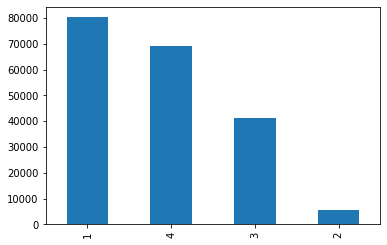

In [244]:
df.grav.value_counts().plot.bar()

In [25]:
y = df.grav
y = y.replace([1, 2, 3, 4],[0, 0, 1, 1])

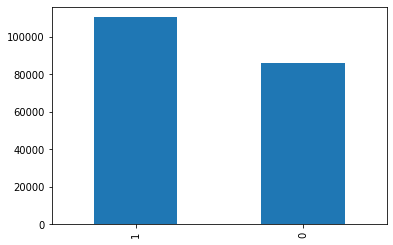

In [31]:
y.value_counts().plot.bar()

## Model construction
### Random Forest

In [18]:
from sklearn.preprocessing import normalize

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import recall_score, f1_score

In [37]:
# Normalization :
X = normalize(X.values)

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X,y)

model_rf = RandomForestClassifier(n_estimators=100, 
                                  max_depth=9
)

model_rf.fit(X_train_rf, y_train_rf)

# Test predictions and training data to compare

predictions_test = model_rf.predict(X_test_rf)

predictions_train = model_rf.predict(X_train_rf)

# Accuracy of both

train_acc = accuracy_score(y_train_rf, predictions_train)
print(train_acc)

test_acc = accuracy_score(y_test_rf, predictions_test)
print(test_acc)

0.7333115828252551
0.7287223196443865


(-1, 153)

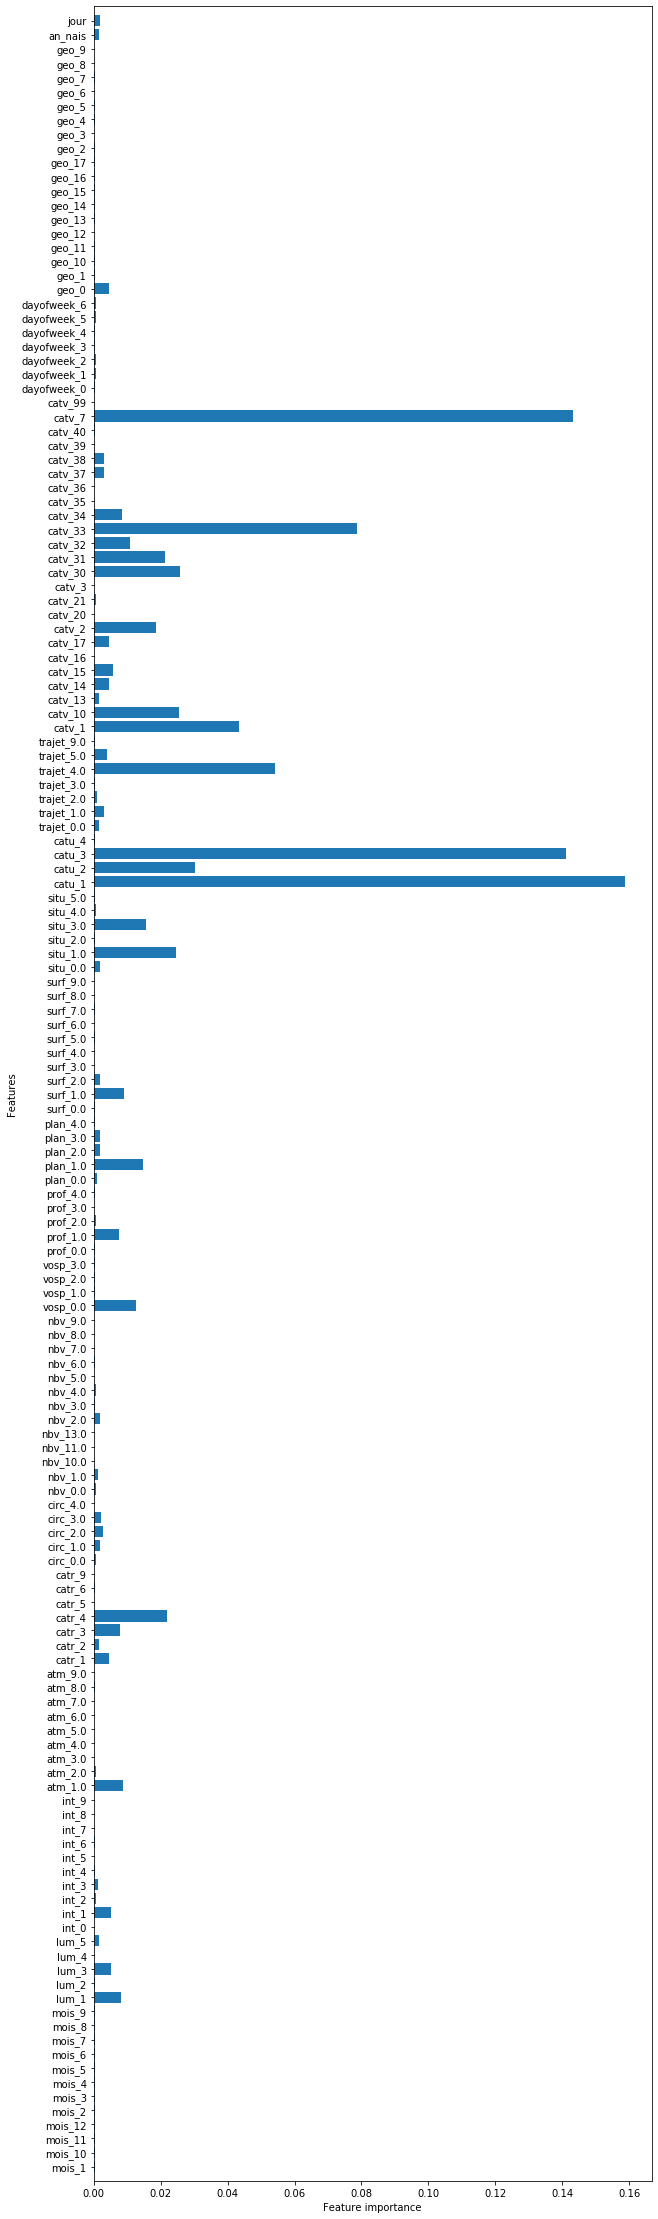

In [48]:
n_features = X.shape[1]
plt.figure(figsize=(10,40))
plt.barh(range(n_features), model_rf.feature_importances_, align="center")
plt.yticks(np.arange(n_features), X.columns)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_features)

(-1, 19)

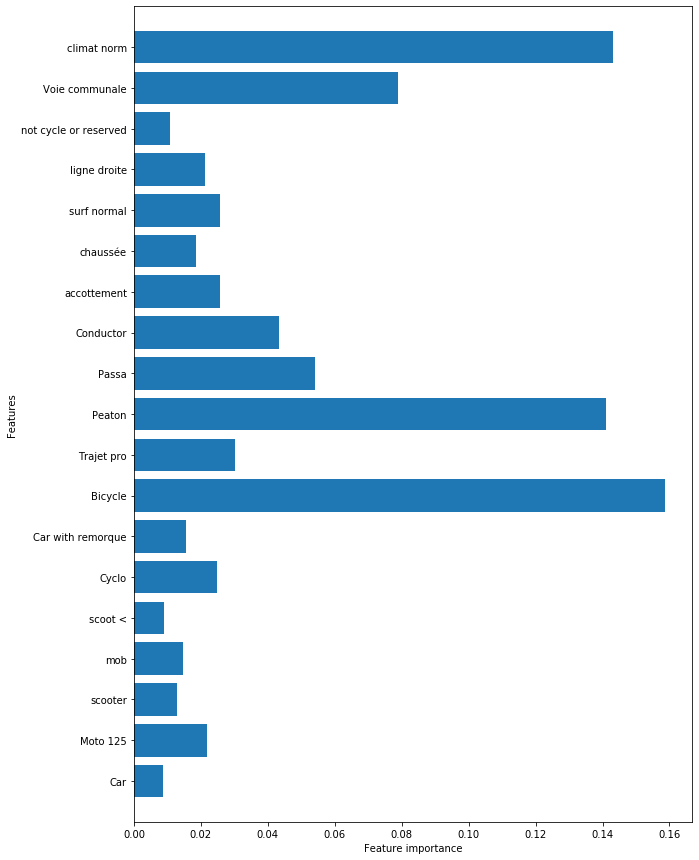

In [81]:
F_import = pd.DataFrame(model_rf.feature_importances_, index=X.columns)
F_import = F_import.drop(F_import[(F_import[0]<0.0085)].index)
n_feat = len(F_import)
plt.figure(figsize=(10,15))
plt.barh(range(n_feat), F_import[0], align="center")
plt.yticks(np.arange(n_feat), ["Car","Moto 125","scooter","mob","scoot <","Cyclo"
                               ,"Car with remorque","Bicycle","Trajet pro","Peaton","Passa","Conductor"
                               ,"accottement","chaussée","surf normal","ligne droite"
                               ,"not cycle or reserved","Voie communale","climat norm"])#F_import.index.values)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.ylim(-1, n_feat)

## XGBoost

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

model_boosting = GradientBoostingClassifier(loss="deviance",
    learning_rate=0.25,
    max_depth=5,
    max_features="sqrt",
    subsample=0.95,
    n_estimators=200)


model_boosting.fit(X_train, y_train)

# Predictions:
predictions_test_xgb = model_boosting.predict(X_test)
predictions_train_xgb = model_boosting.predict(X_train)

# Results:

train_acc = accuracy_score(y_train, predictions_train_xgb)
print(train_acc)

test_acc = accuracy_score(y_test, predictions_test_xgb)
print(test_acc)

0.7547290362485811
0.7392031320092981


## Comparing scores

In [38]:
# Recall of first interest for Random Forest:

recall_rf = recall_score(y_test_rf, predictions_test, average='macro')
print('Recall: %.3f' % recall_rf)

# Recall of first interest for XGBoost

recall = recall_score(y_test, predictions_test_xgb, average='macro')
print('Recall: %.3f' % recall)

# F1-Score for Random Forest:

f1_rf = f1_score(y_test_rf, predictions_test, average='macro')
print('F1-Score: %.3f' % f1_rf)

# F1-Score for XGBoost

f1 = f1_score(y_test, predictions_test_xgb, average='macro')
print('F1-Score: %.3f' % f1)

Recall: 0.728
Recall: 0.739
F1-Score: 0.726
F1-Score: 0.737


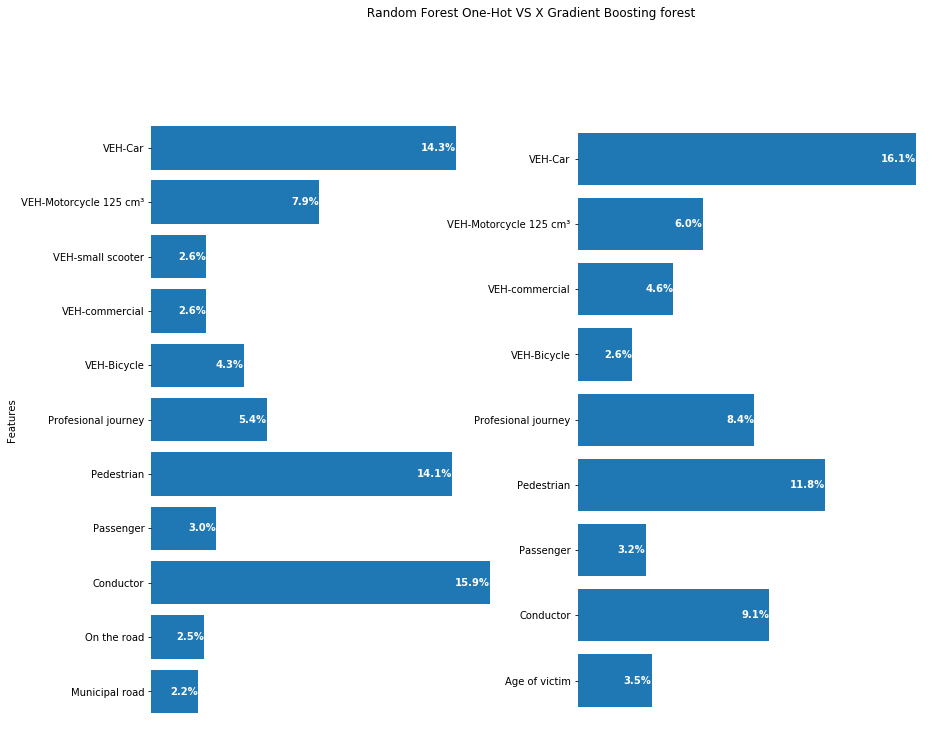

In [204]:
F_rf_pri = pd.DataFrame(model_rf.feature_importances_, index=X.columns)
F_rf_pri = F_rf_pri.drop(F_rf_pri[(F_rf_pri[0]<0.0217)].index)
F_xgb_pri = pd.DataFrame(model_boosting.feature_importances_, index=X.columns)
F_xgb_pri = F_xgb_pri.drop(F_xgb_pri[(F_xgb_pri[0]<0.024)].index)
F_xgb_pri = F_xgb_pri.reindex(["an_nais", 'catu_1', 'catu_2', 'catu_3', 'trajet_4.0'
                               ,'catv_1', 'catv_10', 'catv_33', 'catv_7', ])

n_rf_feat = len(F_rf_pri)
n_xgb_feat = len(F_xgb_pri)

field_content = ["catr_4","situ_1.0", 'catu_1', 'catu_2', 'catu_3', 'trajet_4.0','catv_1'
                 , 'catv_10', 'catv_30', 'catv_33', 'catv_7', "an_nais"]
field_label = ["Municipal road","On the road","Conductor","Passenger","Pedestrian", "Profesional journey", "VEH-Bicycle"
               , "VEH-commercial", "VEH-small scooter", "VEH-Motorcycle 125 cm³", "VEH-Car", "Age of victim"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,12))
fig.suptitle(" Random Forest One-Hot VS X Gradient Boosting forest")

ax1.barh(range(n_rf_feat), F_rf_pri[0], align="center")
ax1.set(xlabel= "Feature importance",
        ylabel = "Features",
        ylim= [-1, n_rf_feat])
ax1.set_yticks(np.arange(n_rf_feat))
rf_feat_pri_label=pd.DataFrame(F_rf_pri.index.values).replace(field_content, field_label)
for i, v in enumerate(F_rf_pri[0]):
    ax1.text(v, i, str(round(v*100,1))+"%",  va="center",ha='right',color="white", fontweight='bold')
ax1.set_yticklabels(rf_feat_pri_label[0])#F_import.index.values)
ax1.xaxis.set_visible(False)
for pos in ['right','top','bottom','left']:
    ax1.spines[pos].set_visible(False)


ax2.barh(range(n_xgb_feat), F_xgb_pri[0], align="center")
ax2.set_yticks(np.arange(n_xgb_feat))
xgb_feat_pri_label=pd.DataFrame(F_xgb_pri.index.values).replace(field_content, field_label)
for i, v in enumerate(F_xgb_pri[0]):
    ax2.text(v, i, str(round(v*100,1))+"%",  va="center",ha='right',color="white", fontweight='bold')

ax2.set_yticklabels(xgb_feat_pri_label[0])
ax2.set(xlabel = "Feature importance", ylim= [-1, n_xgb_feat])
ax2.xaxis.set_visible(False)
for pos in ['right','top','bottom','left']:
    ax2.spines[pos].set_visible(False)

In [19]:
distrib = X[["catr_4","situ_1.0", 'catu_1', 'catu_2', 'catu_3', 'trajet_4.0',
             'catv_1', 'catv_10', 'catv_30', 'catv_33', 'catv_7', "an_nais"]]
distrib["long"]=df.long
distrib["lat"]=df.lat
distrib["target4"]=df.grav
distrib["severity"]=df.grav.replace([1,2,3,4],["material","slight injury","serious injury","death"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

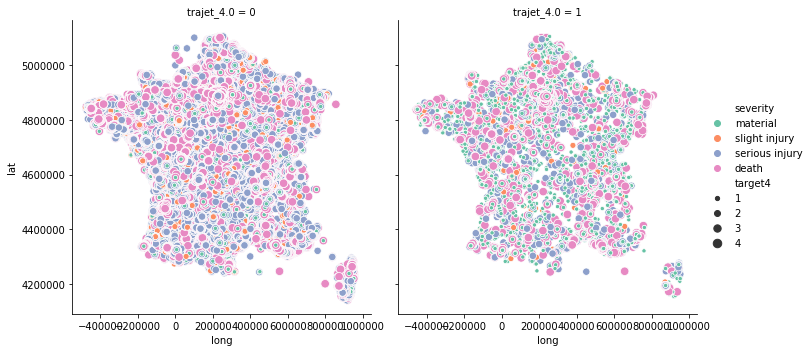

In [238]:
sns.relplot(
    data=distrib, x="long", y="lat", col="trajet_4.0",#df.Num_Acc.astype(str)[2:4], #row='grav',
    hue="severity", size="target4",# style="geo",
    palette="Set2"#, sizes=(10, 100)    , sizes=(20,12)
)

In [ ]:
#conda install -c anaconda seaborn=0.9.0
!conda install -y -c anaconda seaborn=0.9.0
import seaborn as sns;
#sns.set() 

In [ ]:
sns.displot(distrib, x="an_nais", hue="severity", kde=True)

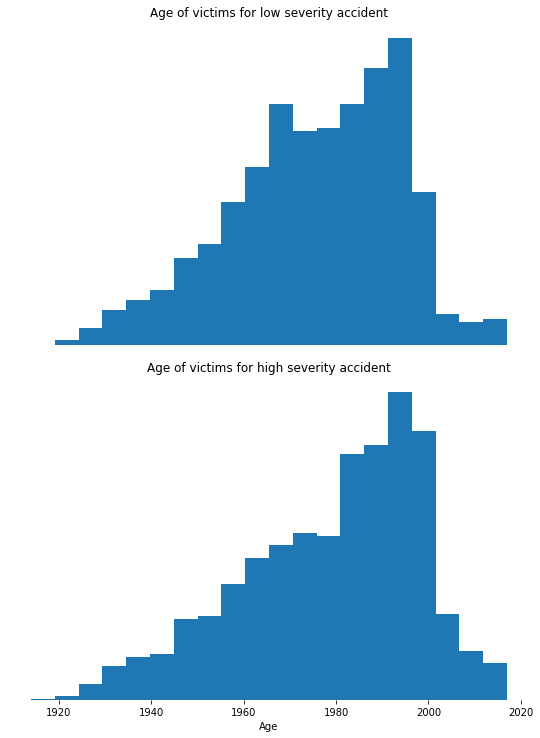

In [35]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,10))
fig.tight_layout()
num_bins = 20

n, bins, patches = ax1.hist(distrib[(distrib.target4==1)|(distrib.target4==2)].an_nais, num_bins, density=True)
ax1.set_title("Age of victims for low severity accident")
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
for pos in ['right','top','bottom','left']:
    ax1.spines[pos].set_visible(False)

n, bins, patches = ax2.hist(distrib[(distrib.target4==3)|(distrib.target4==4)].an_nais, num_bins, density=True)
ax2.set_title("Age of victims for high severity accident")
ax2.set(xlabel= "Age",
        ylabel = "Probability")
ax2.yaxis.set_visible(False)
for pos in ['right','top','bottom','left']:
    ax2.spines[pos].set_visible(False)

In [28]:
Feat_by_target4 = X[['mois_1', 'mois_10', 'mois_11', 'mois_12', 'mois_2', 'mois_3',
       'mois_4', 'mois_5', 'mois_6', 'mois_7', 'mois_8', 'mois_9',
       'lum_1', 'lum_2', 'lum_3', 'lum_4', 'lum_5', 'int_0', 'int_1',
       'int_2', 'int_3', 'int_4', 'int_5', 'int_6', 'int_7', 'int_8',
       'int_9', 'atm_1.0', 'atm_2.0', 'atm_3.0', 'atm_4.0', 'atm_5.0',
       'atm_6.0', 'atm_7.0', 'atm_8.0', 'atm_9.0', 'catr_1', 'catr_2',
       'catr_3', 'catr_4', 'catr_5', 'catr_6', 'catr_9', 'circ_0.0',
       'circ_1.0', 'circ_2.0', 'circ_3.0', 'circ_4.0', 'nbv_0.0',
       'nbv_1.0', 'nbv_10.0', 'nbv_11.0', 'nbv_13.0', 'nbv_2.0',
       'nbv_3.0', 'nbv_4.0', 'nbv_5.0', 'nbv_6.0', 'nbv_7.0', 'nbv_8.0',
       'nbv_9.0', 'vosp_0.0', 'vosp_1.0', 'vosp_2.0', 'vosp_3.0',
       'prof_0.0', 'prof_1.0', 'prof_2.0', 'prof_3.0', 'prof_4.0',
       'plan_0.0', 'plan_1.0', 'plan_2.0', 'plan_3.0', 'plan_4.0',
       'surf_0.0', 'surf_1.0', 'surf_2.0', 'surf_3.0', 'surf_4.0',
       'surf_5.0', 'surf_6.0', 'surf_7.0', 'surf_8.0', 'surf_9.0',
       'situ_0.0', 'situ_1.0', 'situ_2.0', 'situ_3.0', 'situ_4.0',
       'situ_5.0', 'catu_1', 'catu_2', 'catu_3', 'catu_4', 'trajet_0.0',
       'trajet_1.0', 'trajet_2.0', 'trajet_3.0', 'trajet_4.0',
       'trajet_5.0', 'trajet_9.0', 'catv_1', 'catv_10', 'catv_13',
       'catv_14', 'catv_15', 'catv_16', 'catv_17', 'catv_2', 'catv_20',
       'catv_21', 'catv_3', 'catv_30', 'catv_31', 'catv_32', 'catv_33',
       'catv_34', 'catv_35', 'catv_36', 'catv_37', 'catv_38', 'catv_39',
       'catv_40', 'catv_7', 'catv_99', 'dayofweek_0', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'geo_0', 'geo_1', 'geo_10', 'geo_11', 'geo_12',
       'geo_13', 'geo_14', 'geo_15', 'geo_16', 'geo_17', 'geo_2', 'geo_3',
       'geo_4', 'geo_5', 'geo_6', 'geo_7', 'geo_8', 'geo_9']]

In [35]:
Feat_by_target4 = Feat_by_target4.groupby(by="target4").sum()

In [75]:
clean = Feat_by_target4.T.drop(Feat_by_target4.T[Feat_by_target4.T.death<12000].index)
Feat_letal_by_t4 =clean.T.reindex(["material", 'slight injury', 'serious injury', 'death']).T

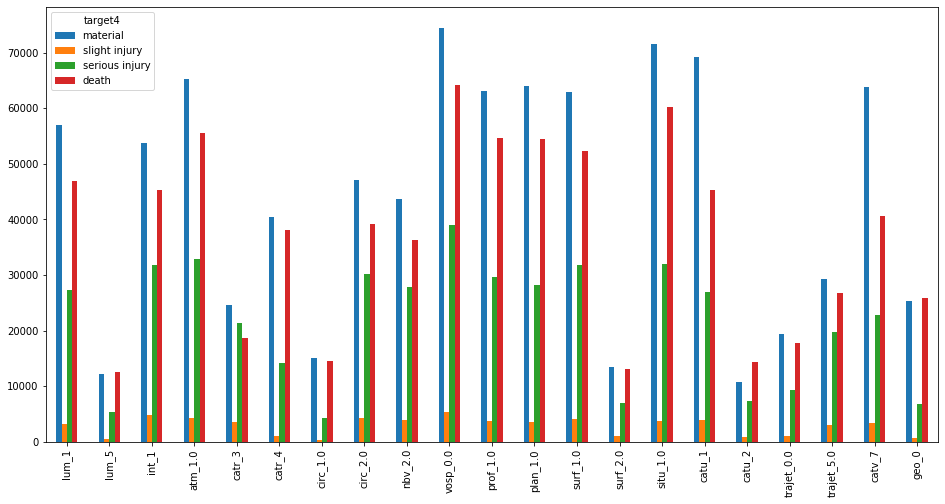

In [76]:
Feat_letal_by_t4.plot.bar(figsize=(16,8))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


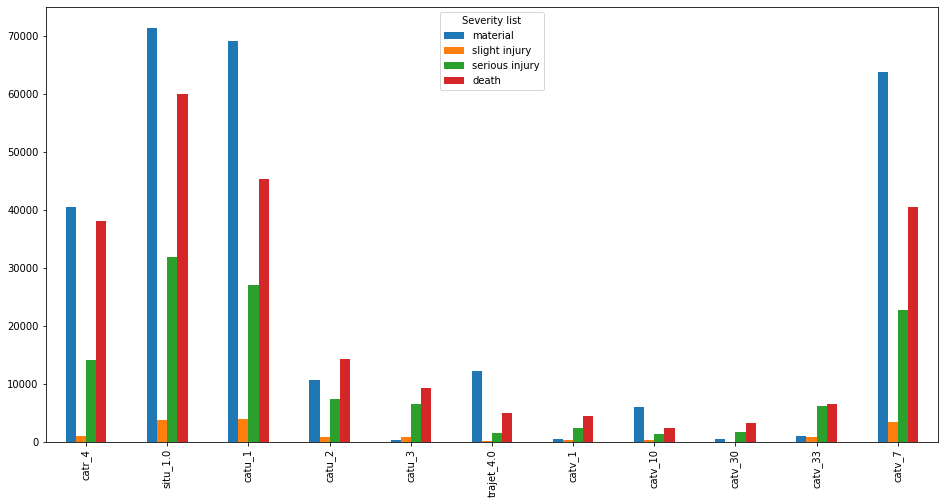

In [95]:
Final_feat = X[['catr_4', 'situ_1.0', 'catu_1', 'catu_2', 'catu_3', 'trajet_4.0',
       'catv_1', 'catv_10', 'catv_30', 'catv_33', 'catv_7']]
Final_feat = Final_feat.reindex(['catr_4', 'situ_1.0', 'catu_1', 'catu_2', 'catu_3', 'trajet_4.0',
       'catv_1', 'catv_10', 'catv_30', 'catv_33', 'catv_7'])
Final_feat['Severity list']=distrib.severity
Final_feat = Final_feat.groupby(by="Severity list").sum()
Final_feat = Final_feat.reindex(["material", 'slight injury', 'serious injury', 'death'])
Final_feat.T.plot.bar(figsize=(16,8), rotate=45)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, 'Pedestrian'),
 Text(0, 0, 'Bicycle'),
 Text(0, 0, 'Small scooter'),
 Text(0, 0, 'Motorcycle')]

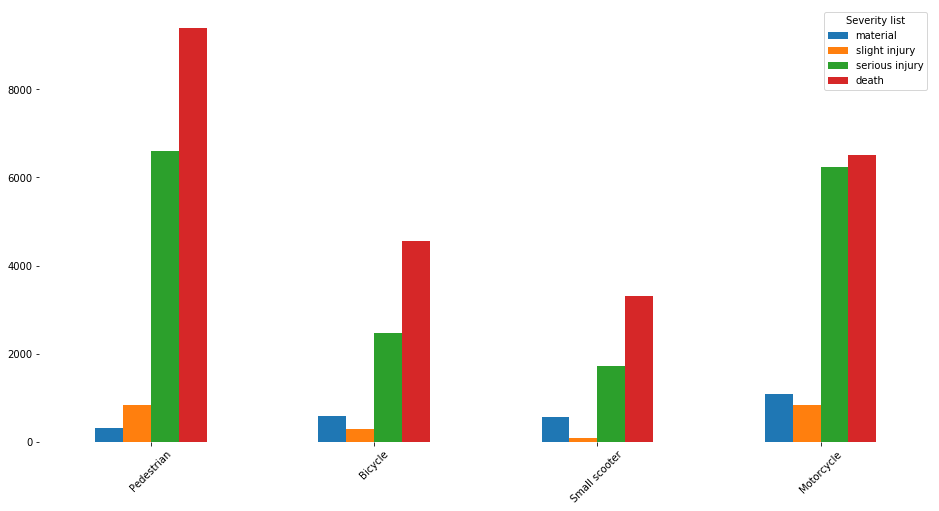

In [114]:
Final_feat = X[['catu_3',  'catv_1', 'catv_30', 'catv_33']]
Final_feat['Severity list']=distrib.severity
Final_feat = Final_feat.groupby(by="Severity list").sum()
Final_feat = Final_feat.reindex(["material", 'slight injury', 'serious injury', 'death'])
ax = Final_feat.T.plot.bar(figsize=(16,8))
for pos in ['right','top','bottom','left']:
    ax.spines[pos].set_visible(False)
#rf_feat_pri_label=pd.DataFrame(F_rf_pri.index.values).replace(field_content, field_label)
ax.set_xticklabels(["Pedestrian","Bicycle","Small scooter", "Motorcycle"], rotation=45)


In [ ]:
#! pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import RandomForestRegressor

prediction, bias, contributions = ti.predict(model_rf, X[1000:1003])
print("Prediction", prediction)
print("Bias (trainset prior)", bias)
print("Feature contributions:")
i=0
for i in [0, 1]:
    for c, feature in zip(contributions[i], df.columns):
        print(feature, c)